In [467]:
import pandas as pd
import numpy as np

In [468]:
file1= pd.read_csv("marketing_customer_analysis.csv")
display(file1.head())
file1.shape

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


(10910, 26)

In [469]:
file1 = file1.drop(['Unnamed: 0'], axis=1)
file1.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [470]:
file1.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Vehicle Type'],
      dtype='object')

In [471]:
cols = []
for c in file1.columns:
    cols.append(c.lower())
cols
file1.columns = cols
file1.columns

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size', 'vehicle type'],
      dtype='object')

In [472]:
file1.dtypes

customer                          object
state                             object
customer lifetime value          float64
response                          object
coverage                          object
education                         object
effective to date                 object
employmentstatus                  object
gender                            object
income                             int64
location code                     object
marital status                    object
monthly premium auto               int64
months since last claim          float64
months since policy inception      int64
number of open complaints        float64
number of policies                 int64
policy type                       object
policy                            object
renew offer type                  object
sales channel                     object
total claim amount               float64
vehicle class                     object
vehicle size                      object
vehicle type    

In [473]:
numerical = file1.select_dtypes(include=['int', 'float']).columns.tolist()
numerical_cols
# or file1.dtypes["int64", "float64"]

['customer lifetime value',
 'income',
 'monthly premium auto',
 'months since last claim',
 'months since policy inception',
 'number of open complaints',
 'number of policies',
 'total claim amount']

In [474]:
categoricals = file1.select_dtypes(include=['object']).columns.tolist()
categorical_cols
# or file1.dtypes["object"]

['customer',
 'state',
 'response',
 'coverage',
 'education',
 'effective to date',
 'employmentstatus',
 'gender',
 'location code',
 'marital status',
 'policy type',
 'policy',
 'renew offer type',
 'sales channel',
 'vehicle class',
 'vehicle size',
 'vehicle type']

In [475]:
file1.isna().sum()

customer                            0
state                             631
customer lifetime value             0
response                          631
coverage                            0
education                           0
effective to date                   0
employmentstatus                    0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           633
months since policy inception       0
number of open complaints         633
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     622
vehicle size                      622
vehicle type                     5482
dtype: int64

In [476]:
file1["state"]. value_counts(dropna=False)

California    3552
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
NaN            631
Name: state, dtype: int64

In [477]:
file1["state"] = file1["state"].fillna("California")
file1["state"].value_counts(dropna=False)

California    4183
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
Name: state, dtype: int64

In [478]:
file1["vehicle type"]. value_counts(dropna=False)

NaN    5482
A      5428
Name: vehicle type, dtype: int64

In [479]:
file1["vehicle type"] = file1["vehicle type"].fillna("M")
file1["vehicle type"].value_counts(dropna=False)

M    5482
A    5428
Name: vehicle type, dtype: int64

In [480]:
file1["months since last claim"]. value_counts(dropna=False)

NaN     633
3.0     426
6.0     394
1.0     386
7.0     378
4.0     373
2.0     368
5.0     355
0.0     354
10.0    346
16.0    333
11.0    331
15.0    323
13.0    320
8.0     315
12.0    307
17.0    299
14.0    299
9.0     277
19.0    276
23.0    276
25.0    269
21.0    267
18.0    257
20.0    254
22.0    246
24.0    237
29.0    234
28.0    227
31.0    221
26.0    211
27.0    208
30.0    201
34.0    199
33.0    198
35.0    157
32.0    155
Name: months since last claim, dtype: int64

In [481]:
# I´m going to change NaN for 0 because there is correlation with number of open complaints
file1["months since last claim"] = file1["months since last claim"].fillna(0.0)
file1["months since last claim"].value_counts(dropna=False)


0.0     987
3.0     426
6.0     394
1.0     386
7.0     378
4.0     373
2.0     368
5.0     355
10.0    346
16.0    333
11.0    331
15.0    323
13.0    320
8.0     315
12.0    307
17.0    299
14.0    299
9.0     277
23.0    276
19.0    276
25.0    269
21.0    267
18.0    257
20.0    254
22.0    246
24.0    237
29.0    234
28.0    227
31.0    221
26.0    211
27.0    208
30.0    201
34.0    199
33.0    198
35.0    157
32.0    155
Name: months since last claim, dtype: int64

In [482]:
file1["number of open complaints"]. value_counts(dropna=False)

0.0    8160
1.0    1145
NaN     633
2.0     414
3.0     324
4.0     166
5.0      68
Name: number of open complaints, dtype: int64

In [483]:
# I´m going to change NaN for 0 because there is correlation with months since last claim
file1["number of open complaints"] = file1["number of open complaints"].fillna(0.0)
file1["number of open complaints"].value_counts(dropna=False)

0.0    8793
1.0    1145
2.0     414
3.0     324
4.0     166
5.0      68
Name: number of open complaints, dtype: int64

In [484]:
file1["vehicle class"]. value_counts(dropna=False)

Four-Door Car    5212
Two-Door Car     2118
SUV              2012
NaN               622
Sports Car        550
Luxury SUV        208
Luxury Car        188
Name: vehicle class, dtype: int64

In [485]:
# I decided to put in Four-Door Car bc is the most typical
file1["vehicle class"] = file1["vehicle class"].fillna("Four-Door Car")
file1["vehicle class"].value_counts(dropna=False)

Four-Door Car    5834
Two-Door Car     2118
SUV              2012
Sports Car        550
Luxury SUV        208
Luxury Car        188
Name: vehicle class, dtype: int64

In [486]:
file1["vehicle size"]. value_counts(dropna=False)

Medsize    7251
Small      1966
Large      1071
NaN         622
Name: vehicle size, dtype: int64

In [487]:
# I decided to put in Medsize bc is the most typical
file1["vehicle size"] = file1["vehicle size"].fillna("Medsize")
file1["vehicle size"].value_counts(dropna=False)

Medsize    7873
Small      1966
Large      1071
Name: vehicle size, dtype: int64

In [488]:
file1["response"]. value_counts(dropna=False)

No     8813
Yes    1466
NaN     631
Name: response, dtype: int64

In [489]:
# I decided to put in Medsize bc is the most typical
file1["response"] = file1["response"].fillna("No")
file1["response"].value_counts(dropna=False)

No     9444
Yes    1466
Name: response, dtype: int64

In [490]:
file1.isna().sum()

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employmentstatus                 0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
vehicle type                     0
dtype: int64

In [491]:
file1["effective to date"].value_counts()

1/10/11    239
1/27/11    239
1/31/11    224
1/17/11    221
2/14/11    221
1/26/11    220
1/3/11     216
1/19/11    212
2/27/11    205
1/28/11    203
2/26/11    202
1/20/11    201
1/21/11    199
2/4/11     198
2/7/11     197
2/19/11    196
2/3/11     195
1/11/11    195
1/5/11     193
2/28/11    192
2/22/11    191
1/2/11     191
2/18/11    186
2/10/11    186
2/11/11    184
1/23/11    184
2/12/11    183
1/18/11    183
2/25/11    183
1/8/11     182
1/29/11    182
1/9/11     182
2/5/11     181
2/1/11     181
2/2/11     181
2/9/11     180
1/14/11    180
1/24/11    179
2/21/11    178
1/7/11     178
2/23/11    176
1/30/11    173
1/15/11    172
1/16/11    172
1/13/11    171
1/1/11     171
2/6/11     171
1/25/11    168
2/13/11    168
2/16/11    167
2/24/11    162
2/17/11    162
1/6/11     161
2/20/11    156
2/15/11    155
2/8/11     155
1/22/11    148
1/12/11    148
1/4/11     131
Name: effective to date, dtype: int64

In [492]:
file1['effective to date'] = pd.to_datetime(file1['effective to date'])
file1['month'] = file1['effective to date'].dt.month
q1_data = file1[file1['month']<4]
display (q1_data)
display(file1)

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,M,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,M,2
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,M,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,M,2
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [493]:
def new_data(dataframe):
    display(file1.head())
    file1.shape
    file1 = file1.drop(['Unnamed: 0'], axis=1)

**Here start round 3**

In [494]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       10910 non-null  object        
 1   state                          10910 non-null  object        
 2   customer lifetime value        10910 non-null  float64       
 3   response                       10910 non-null  object        
 4   coverage                       10910 non-null  object        
 5   education                      10910 non-null  object        
 6   effective to date              10910 non-null  datetime64[ns]
 7   employmentstatus               10910 non-null  object        
 8   gender                         10910 non-null  object        
 9   income                         10910 non-null  int64         
 10  location code                  10910 non-null  object        
 11  marital status 

In [495]:
file1.describe()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,8018.241094,37536.284785,93.196059,14.270119,48.091934,0.361962,2.979193,434.888330,1.466728
std,6885.081434,30359.195670,34.442532,10.404862,27.940675,0.890134,2.399359,292.180556,0.498915
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,4014.453113,0.000000,68.000000,5.000000,24.000000,0.000000,1.000000,271.082527,1.000000
50%,5771.147235,33813.500000,83.000000,13.000000,48.000000,0.000000,2.000000,382.564630,1.000000
75%,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


<AxesSubplot:xlabel='response', ylabel='count'>

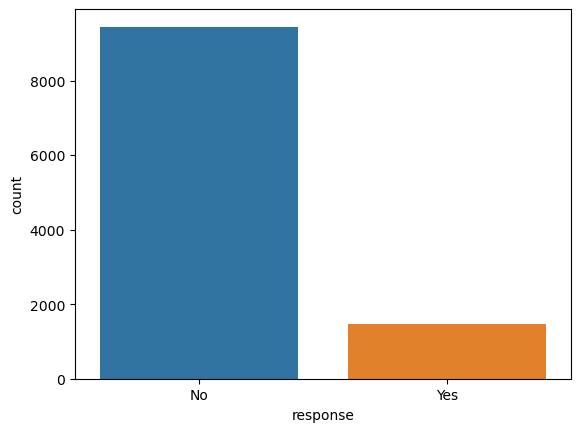

In [496]:
# Show a plot of the total number of responses.
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
sns.countplot(x=file1["response"])


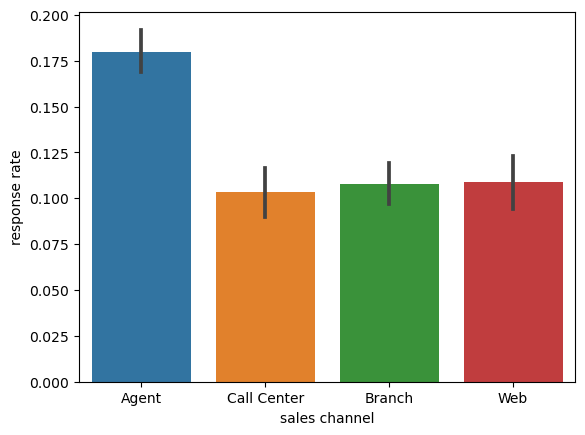

In [497]:
file1['response rate'] = np.where(file1['response'] == "Yes", 1, 0)
import matplotlib.pyplot as plt
import seaborn as sns

file1

sns.barplot(x ='sales channel',y = "response rate", data = file1)
plt.show()

In [498]:
# Show a plot of the response rate by the total claim amount.
file1["total claim amount"].describe()


count    10910.000000
mean       434.888330
std        292.180556
min          0.099007
25%        271.082527
50%        382.564630
75%        547.200000
max       2893.239678
Name: total claim amount, dtype: float64

In [499]:
bin1 =pd.cut(file1["total claim amount"], labels =['0-150', '150-300', '300-450', '450-600', '600-750','750-900','<900'], bins =[0,150,300,450,600,750,900,2900])
file1 ["total claim amount range"] = bin1
bin1.value_counts()

300-450    3233
450-600    2295
150-300    1686
0-150      1550
600-750     937
<900        704
750-900     505
Name: total claim amount, dtype: int64

<AxesSubplot:xlabel='total claim amount range', ylabel='response rate'>

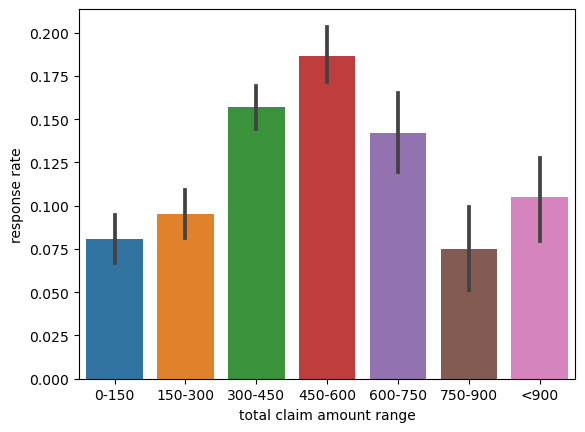

In [500]:
sns.barplot(x="total claim amount range", y="response rate", data=file1)

In [501]:
# Show a plot of the response rate by income.
file1["income"].describe()

count    10910.000000
mean     37536.284785
std      30359.195670
min          0.000000
25%          0.000000
50%      33813.500000
75%      62250.750000
max      99981.000000
Name: income, dtype: float64

In [502]:
bin2 =pd.cut(file1["income"], labels =['>20000', '20000-30000', '30000-40000',"40000-50000","50000-60000", '>60000'], bins =[0,20000,30000,40000,50000,60000,100000])
file1 ["income by range"] = bin2
bin2.value_counts()

>60000         2970
20000-30000    1632
30000-40000    1070
50000-60000     938
40000-50000     881
>20000          632
Name: income, dtype: int64

<AxesSubplot:xlabel='income by range', ylabel='response rate'>

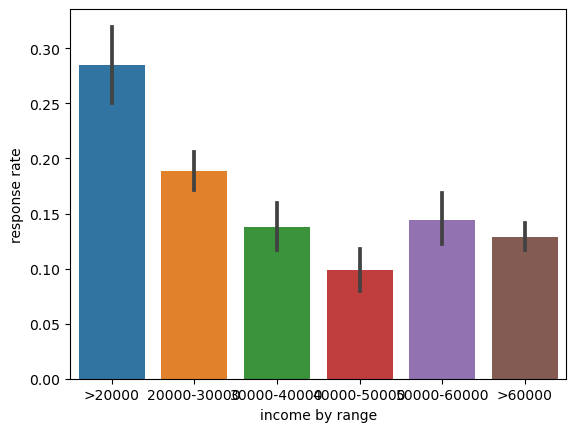

In [503]:
sns.barplot(x="income by range", y="response rate", data=file1)

In [504]:
# # Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)
numerical = file1.select_dtypes(include = np.number)
numerical.columns

Index(['customer lifetime value', 'income', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'total claim amount',
       'month', 'response rate'],
      dtype='object')

In [505]:
print ("This are categorical columns",categoricals)

This are categorical columns ['customer', 'state', 'response', 'coverage', 'education', 'effective to date', 'employmentstatus', 'gender', 'location code', 'marital status', 'policy type', 'policy', 'renew offer type', 'sales channel', 'vehicle class', 'vehicle size', 'vehicle type']


**Round 4**

In [506]:
# Now we will try to check the normality of the numerical variables visually
# Use seaborn library to construct distribution plots for the numerical variables
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

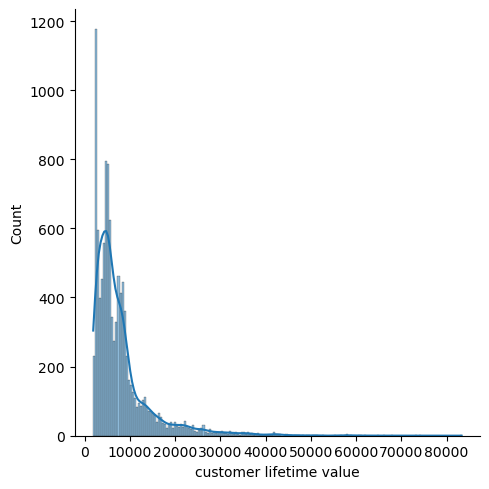

In [507]:
sns.displot(data=numerical, x="customer lifetime value", kde=True)
plt.show()

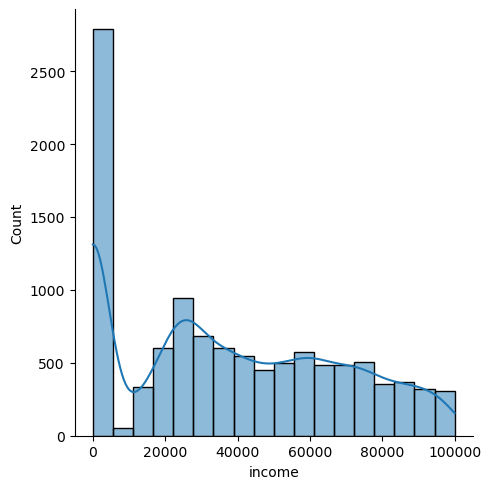

In [508]:
sns.displot(data=numerical, x="income", kde=True)
plt.show()

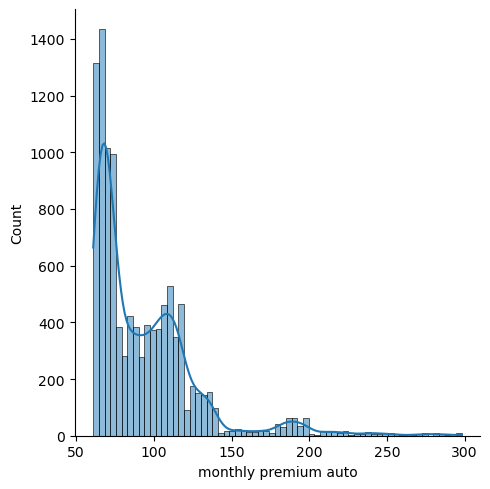

In [509]:
sns.displot(data=numerical, x="monthly premium auto", kde=True)
plt.show()

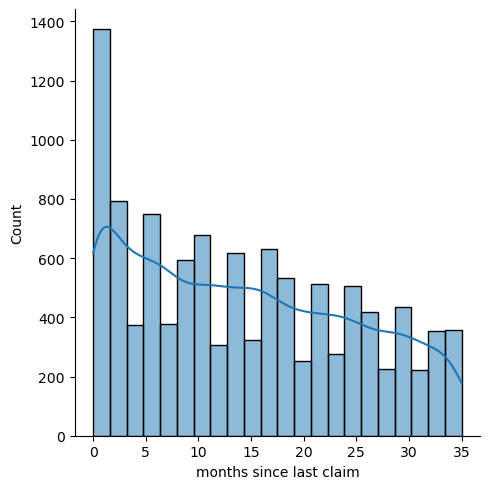

In [528]:
sns.displot(data=numerical, x="months since last claim", kde=True)
plt.show()

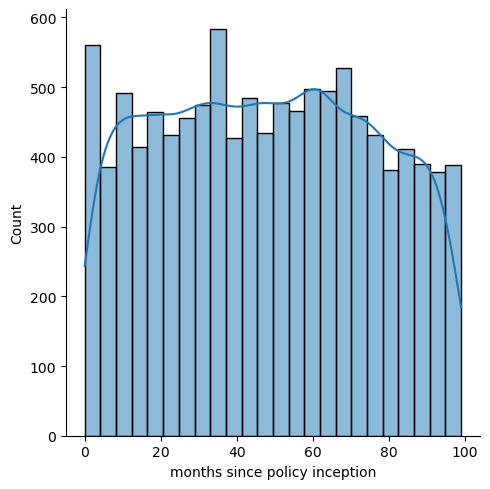

In [511]:
sns.displot(data=numerical, x="months since policy inception", kde=True)
plt.show()

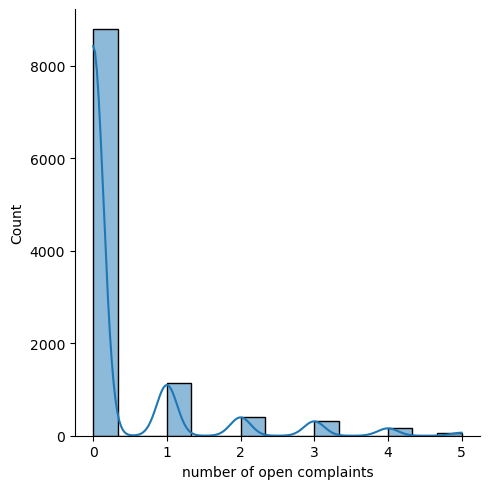

In [512]:
sns.displot(data=numerical, x="number of open complaints", kde=True)
plt.show()

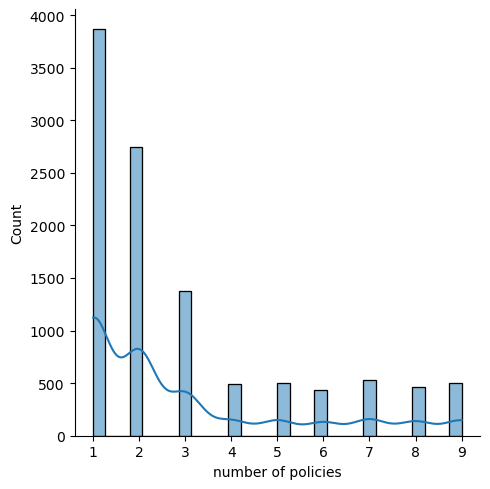

In [513]:
sns.displot(data=numerical, x="number of policies", kde=True)
plt.show()

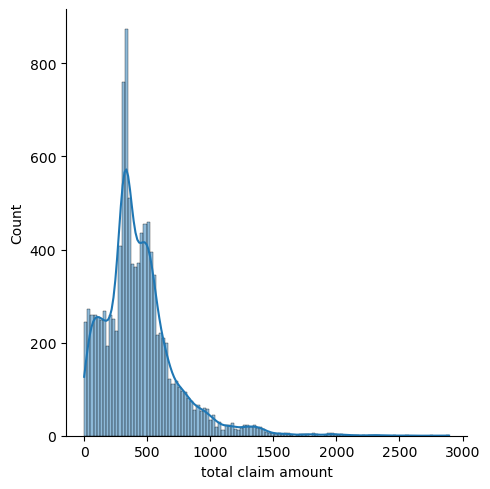

In [514]:
sns.displot(data=numerical, x="total claim amount", kde=True)
plt.show()

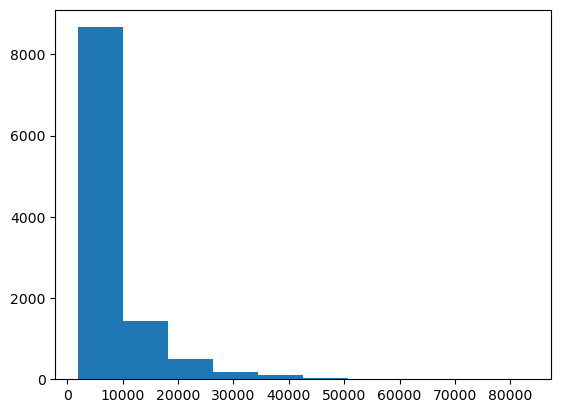

In [515]:
# Use Matplotlib to construct histograms
plt.hist(numerical['customer lifetime value'])
plt.show()

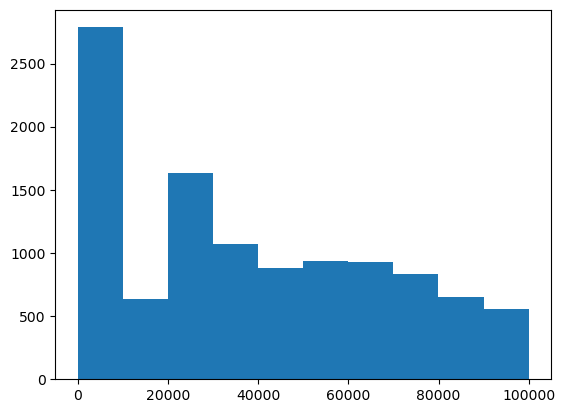

In [516]:
plt.hist(numerical['income'])
plt.show()

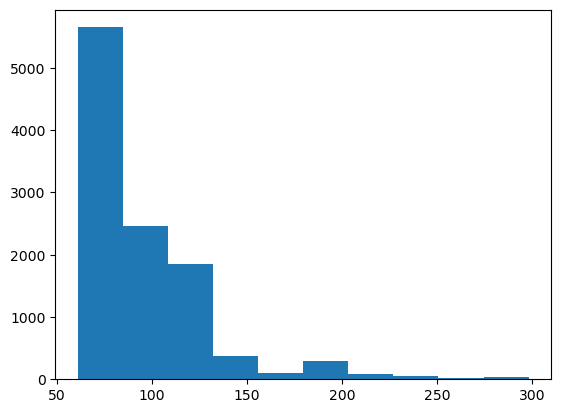

In [517]:
plt.hist(numerical['monthly premium auto'])
plt.show()

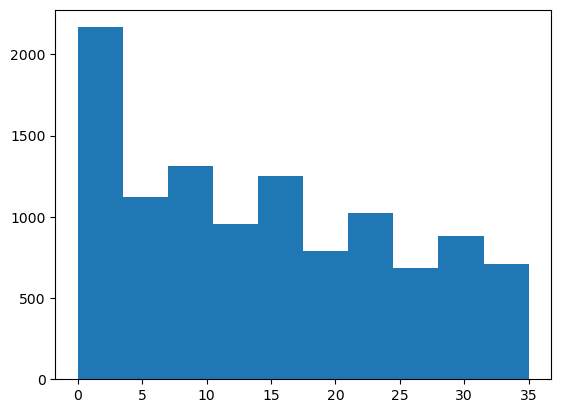

In [518]:
plt.hist(numerical['months since last claim'])
plt.show()

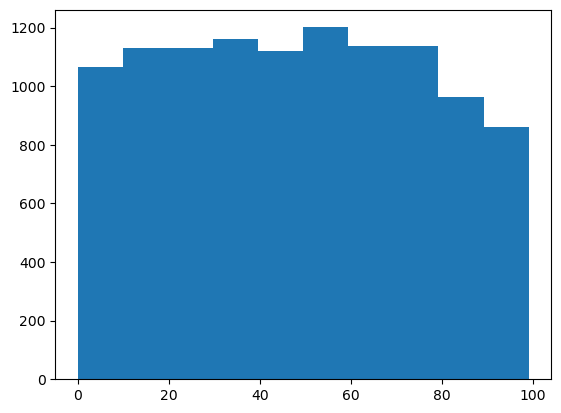

In [519]:
plt.hist(numerical["months since policy inception"])
plt.show()

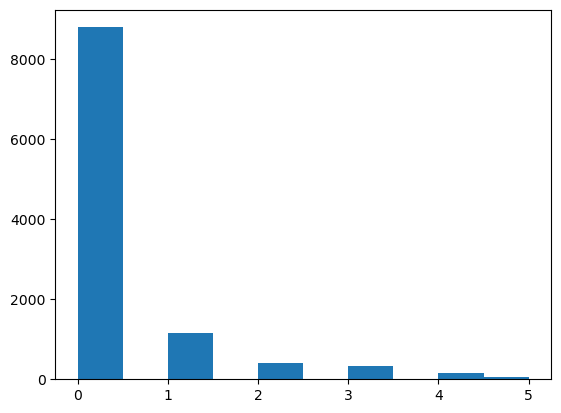

In [520]:
plt.hist(numerical['number of open complaints'])
plt.show()

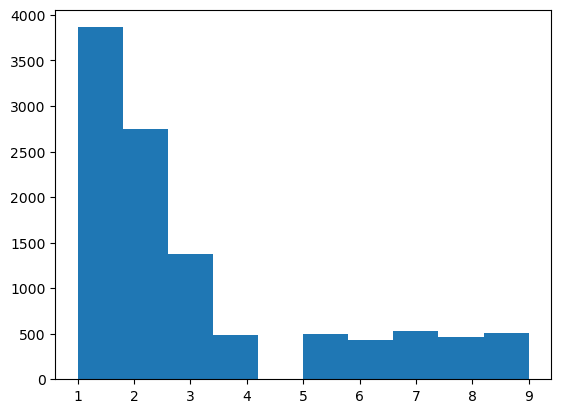

In [521]:
plt.hist(numerical['number of policies'])
plt.show()

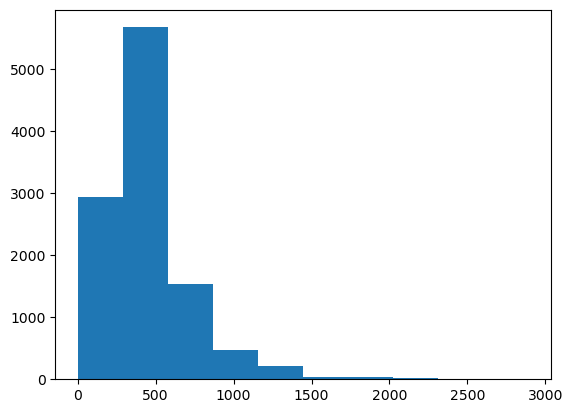

In [522]:
plt.hist(numerical['total claim amount'])
plt.show()

In [523]:
# Do the distributions for different numerical variables look like a normal distribution
# Most of them don´t show normal distribution. However, "months since policy inception" is the only one which has a similar figure.

In [524]:
# For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
# There isn´t multicollinearity between the features

In [527]:
# Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features
correlations_matrix = numerical.corr()
correlations_matrix

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month,response rate
customer lifetime value,1.000000,0.028306,0.403069,0.017189,0.016960,-0.030616,0.016024,0.232626,-0.009234,-0.007765
income,0.028306,1.000000,-0.009788,-0.016671,-0.005903,0.008425,-0.009960,-0.354141,-0.000443,0.011156
monthly premium auto,0.403069,-0.009788,1.000000,0.007845,0.018953,-0.010059,-0.020505,0.631799,0.007253,0.013918
months since last claim,0.017189,-0.016671,0.007845,1.000000,-0.036081,0.036455,-0.000649,0.007210,-0.022099,-0.011572
months since policy inception,0.016960,-0.005903,0.018953,-0.036081,1.000000,0.004165,-0.009123,0.003095,0.015163,-0.004875
number of open complaints,-0.030616,0.008425,-0.010059,0.036455,0.004165,1.000000,0.001681,-0.012380,-0.005802,-0.004419
number of policies,0.016024,-0.009960,-0.020505,-0.000649,-0.009123,0.001681,1.000000,-0.008923,0.005127,-0.018650
total claim amount,0.232626,-0.354141,0.631799,0.007210,0.003095,-0.012380,-0.008923,1.000000,0.001425,0.016416
month,-0.009234,-0.000443,0.007253,-0.022099,0.015163,-0.005802,0.005127,0.001425,1.000000,-0.032981
response rate,-0.007765,0.011156,0.013918,-0.011572,-0.004875,-0.004419,-0.018650,0.016416,-0.032981,1.000000


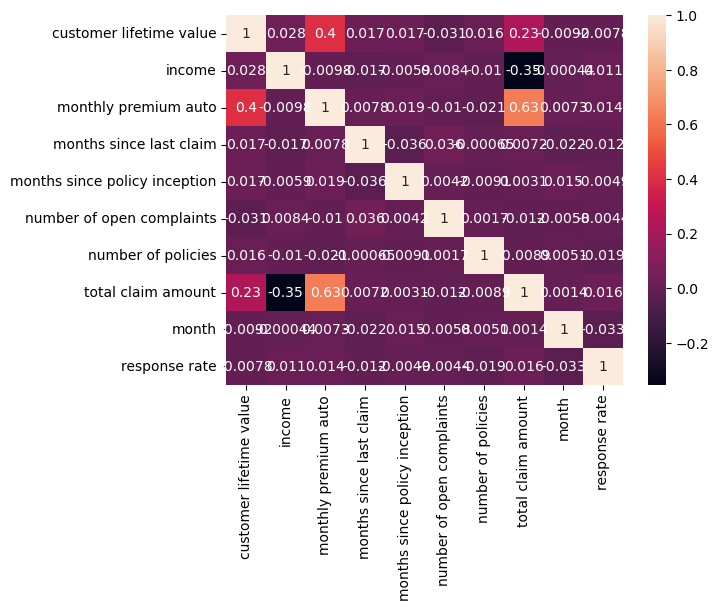

In [526]:
sns.heatmap(correlations_matrix, annot=True)
plt.show()

**Round 5**

In [530]:
# X-y split
from sklearn.preprocessing import MinMaxScaler 

y = numerical['total claim amount']
X = numerical.drop(['total claim amount'], axis=1)
X_num = X.select_dtypes(include = np.number)

In [535]:
X_num

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,month,response rate
0,4809.216960,48029,61,7.0,52,0.0,9,2,0
1,2228.525238,0,64,3.0,26,0.0,1,1,0
2,14947.917300,22139,100,34.0,31,0.0,2,2,0
3,22332.439460,49078,97,10.0,3,0.0,2,1,1
4,9025.067525,23675,117,0.0,31,0.0,7,1,0
...,...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,0.0,40,0.0,7,1,0
10906,5259.444853,61146,65,7.0,68,0.0,6,1,0
10907,23893.304100,39837,201,11.0,63,0.0,2,2,0
10908,11971.977650,64195,158,0.0,27,4.0,6,2,0


In [533]:
transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)
x_normalized
pd.DataFrame(x_normalized, columns=X_num.columns)

(10910, 9)


,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,month,response rate
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000,1.0,0.0
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000,0.0,0.0
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125,1.0,0.0
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125,0.0,1.0
4,0.087527,0.236795,0.236287,0.000000,0.313131,0.0,0.750,0.0,0.0
...,...,...,...,...,...,...,...,...,...
10905,0.167823,0.000000,0.810127,0.000000,0.404040,0.0,0.750,0.0,0.0
10906,0.041281,0.611576,0.016878,0.200000,0.686869,0.0,0.625,0.0,0.0
10907,0.270122,0.398446,0.590717,0.314286,0.636364,0.0,0.125,1.0,0.0
10908,0.123717,0.642072,0.409283,0.000000,0.272727,0.8,0.625,1.0,0.0
